## Final Project Submission

Please fill out:
* Student name: Gustavo Chavez
* Student pace: self paced / part time / full time:  Full time
* Scheduled project review date/time: Not yet scheduled
* Instructor name: Rafael Carrasco
* Blog post URL: Not yet made

In [1]:
import numpy as np
import pandas as pd
import os
import pandasql
from pandasql import sqldf
from matplotlib import pyplot as plt
import seaborn as sns
import string
%matplotlib inline
# Importing neccessary packages

In [2]:
pysqldf = lambda q: sqldf(q, globals())

### Now, let's pull the data we plan on using

The question we are asking is two-fold. what genres perform the best overall, and if we were to look at it region specifically, would we see a difference in that. This is the beginning question, we might ask more questions related to this here as well. In fact, anything that has to do with Genres, we will probably ask and answer here.

In [3]:
imdb_df = pd.read_csv("cleaneddata/imdb_main_table.csv")
bom_gross_df = pd.read_csv("cleaneddata/bom_movie_gross.csv")
rt_df = pd.read_csv("cleaneddata/rotten_tomatos_data.csv")
tmdb_df = pd.read_csv("cleaneddata/tmdb_movies.csv")
tn_df = pd.read_csv("cleaneddata/tn_movies.csv")

In [4]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
Unnamed: 0        3387 non-null int64
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 158.9+ KB


In [5]:
display(imdb_df.head(2))
imdb_df = imdb_df[imdb_df['genres'].notna()] # changes database to only include rows with genres.
imdb_df.info()

,Unnamed: 0,title_id,ordering,region,language,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,tt0063540,15,"IN,IN,IN,IN","hi,hi,hi",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,1,tt0066787,10,"XWW,IN",en,nm0002411,NaN,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36663 entries, 0 to 36869
Data columns (total 14 columns):
Unnamed: 0         36663 non-null int64
title_id           36663 non-null object
ordering           36663 non-null int64
region             36663 non-null object
language           20992 non-null object
directors          36544 non-null object
writers            33251 non-null object
primary_title      36663 non-null object
original_title     36663 non-null object
start_year         36663 non-null int64
runtime_minutes    34815 non-null float64
genres             36663 non-null object
averagerating      36663 non-null float64
numvotes           36663 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 4.2+ MB


In [6]:
# Splits columns to allow exploding later
try:
    imdb_df['genres'] = imdb_df['genres'].apply(lambda x: x.split(','))
    imdb_df['region'] = imdb_df['region'].apply(lambda x: x.split(','))
except:
    print('haha')
imdb_df.head(2)

,Unnamed: 0,title_id,ordering,region,language,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,tt0063540,15,"[IN, IN, IN, IN]","hi,hi,hi",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,1,tt0066787,10,"[XWW, IN]",en,nm0002411,NaN,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43


In [7]:
# Explodes column and lengthens dataframe
imdb_exploded = imdb_df.explode('genres')

In [8]:
# Groups to acquire numbers
exploded_grouped = imdb_exploded[['runtime_minutes','averagerating','numvotes','genres']][imdb_exploded['numvotes']>10]\
.groupby('genres').agg(['mean','count'])
exploded_grouped.head(3)

runtime_minutes       averagerating            numvotes      
                     mean count          mean count          mean count
genres                                                                 
Action         106.011387  3864      5.659376  4005  25175.329588  4005
Adult                 NaN     0      3.400000     1     28.000000     1
Adventure       98.284011  2264      5.942030  2315  36152.608639  2315

# Question 1: What genres are highly rated?

In [9]:
# Flattens and reassigns names to column
exploded_grouped.columns= exploded_grouped.columns.get_level_values(0)
exploded_grouped.columns = ['runtime_mins_mean','runtime_mins_count','avg_rating_mean'\
                               ,'avg_rating_count','numvotes_mean','numvotes_count']

In [10]:
# Allows genres to be a column again
exploded_grouped = exploded_grouped.reset_index()

In [11]:
exploded_grouped.head()

,genres,runtime_mins_mean,runtime_mins_count,avg_rating_mean,avg_rating_count,numvotes_mean,numvotes_count
0,Action,106.011387,3864,5.659376,4005,25175.329588,4005
1,Adult,NaN,0,3.400000,1,28.000000,1
2,Adventure,98.284011,2264,5.942030,2315,36152.608639,2315
3,Animation,87.201275,1098,6.247507,1143,13393.255468,1143
4,Biography,99.721175,1804,6.972579,1838,11649.955386,1838


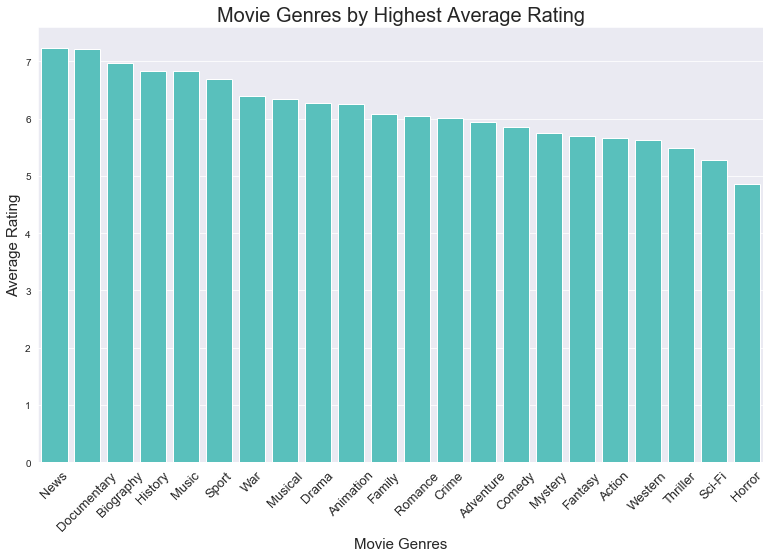

In [15]:
# Subsets data for plotting
mini_cut = exploded_grouped[['genres','avg_rating_mean']][exploded_grouped['numvotes_count']>100]

plt.figure(figsize=(13,8))
sns.set_style('darkgrid')

# make plot and sort bars
fig1 = sns.barplot(data = mini_cut, x = 'genres' ,y = 'avg_rating_mean', color="mediumturquoise",\
            order = mini_cut.sort_values('avg_rating_mean',ascending=False).genres)

# set labels
plt.xlabel('Movie Genres',size=15)
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=45,fontdict={'fontsize':13})
plt.ylabel('Average Rating', size=15)
plt.title("Movie Genres by Highest Average Rating",size=20)
plt.show()

# Question 2: How do the Genres perform in Gross?

In [17]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
Unnamed: 0        3387 non-null int64
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 158.9+ KB


In [18]:
imdb_bom_df = pd.merge(left=imdb_df, right=bom_gross_df, left_on='primary_title', right_on='title',how='inner')

In [19]:
imdb_bom_df['total_gross'] = imdb_bom_df['domestic_gross'].fillna(0) + imdb_bom_df['foreign_gross'].fillna(0)

In [20]:
imdb_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 2789
Data columns (total 21 columns):
Unnamed: 0_x       2790 non-null int64
title_id           2790 non-null object
ordering           2790 non-null int64
region             2790 non-null object
language           2406 non-null object
directors          2788 non-null object
writers            2711 non-null object
primary_title      2790 non-null object
original_title     2790 non-null object
start_year         2790 non-null int64
runtime_minutes    2781 non-null float64
genres             2790 non-null object
averagerating      2790 non-null float64
numvotes           2790 non-null int64
Unnamed: 0_y       2790 non-null int64
title              2790 non-null object
studio             2790 non-null object
domestic_gross     2773 non-null float64
foreign_gross      1690 non-null float64
year               2790 non-null int64
total_gross        2790 non-null float64
dtypes: float64(5), int64(6), object(10)
memory usage:

In [21]:
# Method chains to produce graphable dataframe
genre_gross_supercut = imdb_bom_df[['original_title','genres','total_gross']][imdb_bom_df['total_gross']>0].explode('genres')\
                        .groupby('genres').agg(['mean','median']).reset_index()

# resets index and adjusts total gross to millions
genre_gross_supercut.columns = genre_gross_supercut.columns.get_level_values(0)
genre_gross_supercut['total_gross'] = genre_gross_supercut['total_gross']/1000000
genre_gross_supercut.columns = ['genres','total_gross_mean','total_gross_median']
genre_gross_supercut.head()

,genres,total_gross_mean,total_gross_median
0,Action,169.959040,59.9000
1,Adventure,271.858958,149.3000
2,Animation,256.942528,120.9000
3,Biography,44.141010,6.0006
4,Comedy,85.820295,14.0000


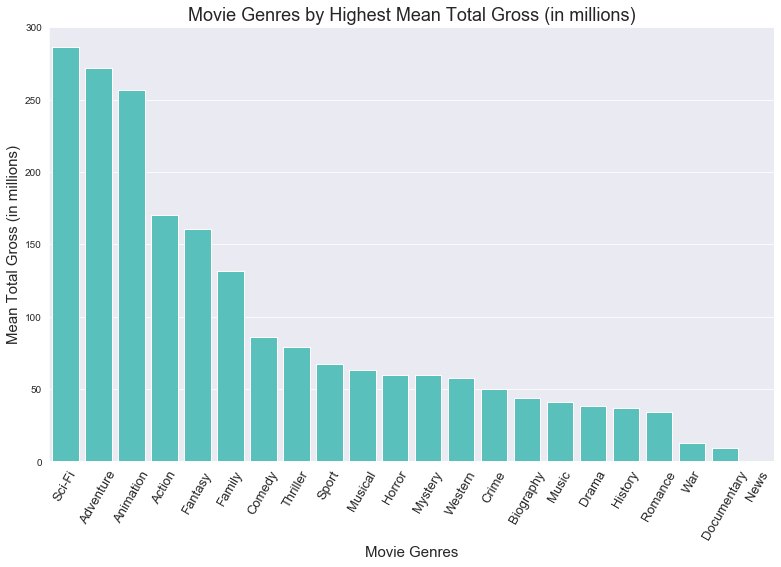

In [24]:
plt.figure(figsize=(13,8))
sns.set_style('darkgrid')

#make plot and sort bars
fig2 = sns.barplot(data = genre_gross_supercut, x = 'genres' ,y = 'total_gross_mean', color="mediumturquoise",\
            order = genre_gross_supercut.sort_values('total_gross_mean',ascending=False).genres)

#set labels
plt.xlabel('Movie Genres',size=15)
fig2.set_xticklabels(fig2.get_xticklabels(),rotation=60,fontdict={'fontsize':13})
plt.ylabel('Mean Total Gross (in millions)', size=15)
plt.title("Movie Genres by Highest Mean Total Gross (in millions)",size=18)
plt.show()

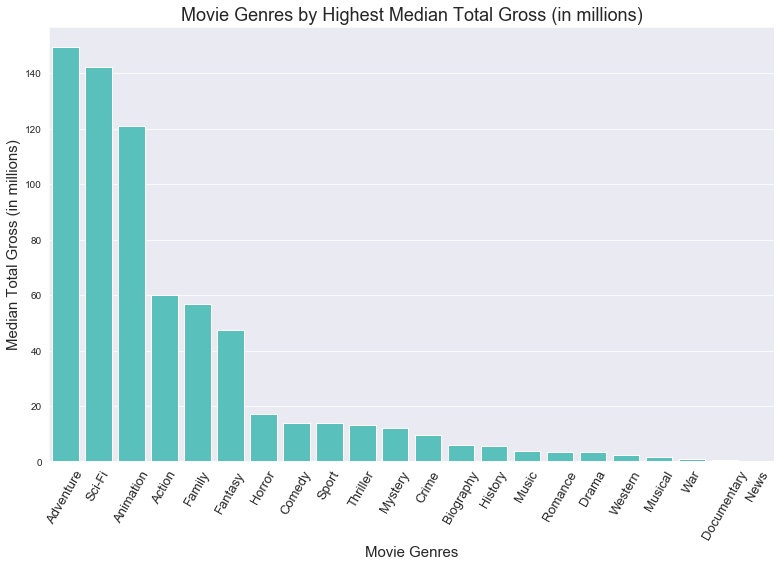

In [25]:
plt.figure(figsize=(13,8))
sns.set_style('darkgrid')

#make plot and sort bars
fig3 = sns.barplot(data = genre_gross_supercut, x = 'genres' ,y = 'total_gross_median', color="mediumturquoise",\
            order = genre_gross_supercut.sort_values('total_gross_median',ascending=False).genres)

#set labels
plt.xlabel('Movie Genres',size=15)
fig3.set_xticklabels(fig3.get_xticklabels(),rotation=60,fontdict={'fontsize':13})
plt.ylabel('Median Total Gross (in millions)', size=15)
plt.title("Movie Genres by Highest Median Total Gross (in millions)",size=18)
plt.show()